In [31]:
# Important imports
import warnings
warnings.filterwarnings('ignore')
 
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from mpl_toolkits import mplot3d
 
from sklearn import datasets
from sklearn.linear_model import LinearRegression
 
from sklearn.metrics import mean_squared_error
 
# Loading dat
boston = datasets.load_boston()
 
# Creating dataframe
df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
df['price'] = boston['target']
 
# Shuffling the dataframe
df = df.sample(n=len(df), random_state=20).reset_index(drop=True)
 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
1,0.04294,28.0,15.04,0.0,0.464,6.249,77.3,3.6150,4.0,270.0,18.2,396.90,10.59,20.6
2,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
3,0.40771,0.0,6.20,1.0,0.507,6.164,91.3,3.0480,8.0,307.0,17.4,395.24,21.46,21.7
4,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4


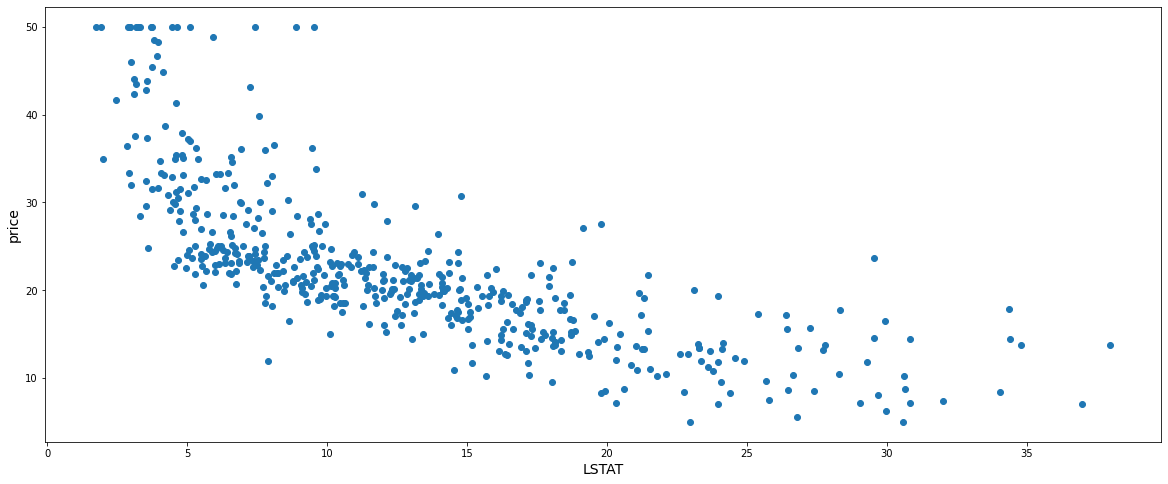

In [2]:
plt.figure(figsize=(20,8))
plt.scatter(df.LSTAT, df.price)
plt.xlabel('LSTAT', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.show()

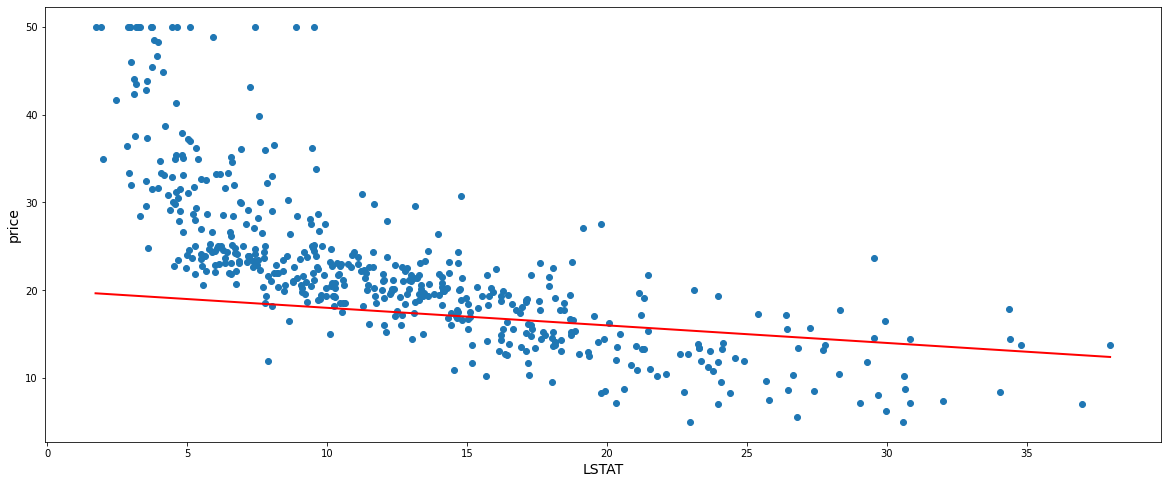

In [3]:
# 'best_fit' is the custom function to fit the straight line with the provided coefficient and intercept
def best_fit(X,y,m,c):
     
    plt.figure(figsize=(20,8))
     
    # A scatter plot is produced for the data points
    plt.scatter(X, y)
     
    x = X.sort_values()
    # predictions are made based on the passed value of m and c
    predics = [(i*m)+c for i in x]
     
    # The predicted line is plotted in the same scatter plot graph
    plt.plot(x,predics, color='red', linewidth=2)
    plt.xlabel('LSTAT', fontsize=14)
    plt.ylabel('price', fontsize=14)
    plt.show()
    
############################################################################
 
best_fit(df.LSTAT,df.price,-0.2,20)

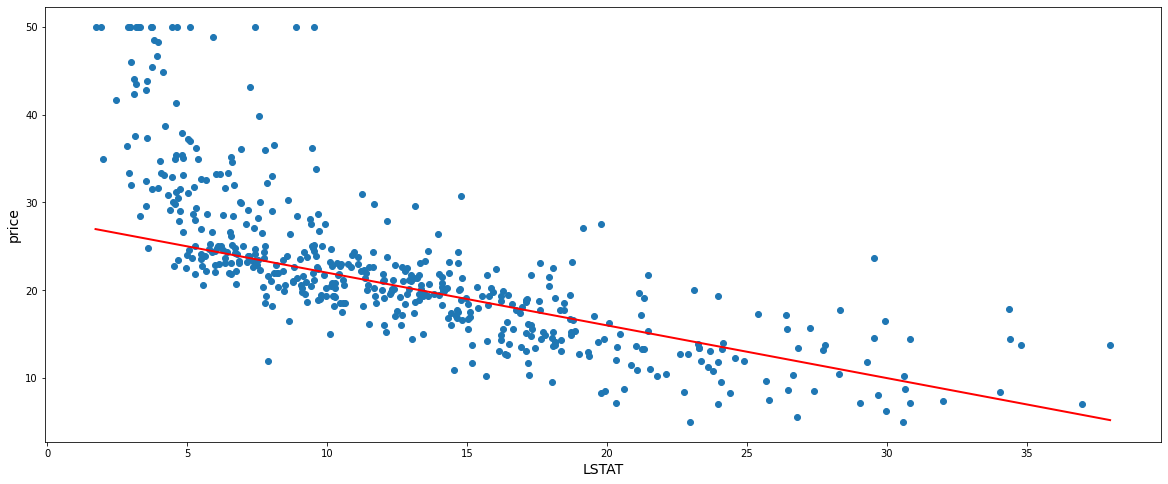

In [4]:
best_fit(df.LSTAT,df.price,-0.6,28)

In [5]:
# 'gradients' function returns
def gradients(X,y,m,c):
     
    # Number of rows of data points
    N = len(X)
     
    # Prediction is done
    predicted = (m*X) + c
     
    # Gradients are calculated
    m_gradient = sum((y-predicted)*X)*(-2/N)
    c_gradient = sum(y-predicted)*(-2/N)
    return [m_gradient, c_gradient]
 
    
gradients(df.LSTAT,df.price,-0.2,20)

[-51.78952830039523, -10.126837944664022]

In [13]:
m = -0.2
c = 20
lrn = 0.001
 
# Slope gradient
m_gradient = gradients(df.LSTAT, df.price, m, c)[0]
 
# Intercept gradient
c_gradient = gradients(df.LSTAT, df.price, m, c)[1]

In [14]:
m = m - (lrn*m_gradient)
c = c - (lrn*c_gradient)

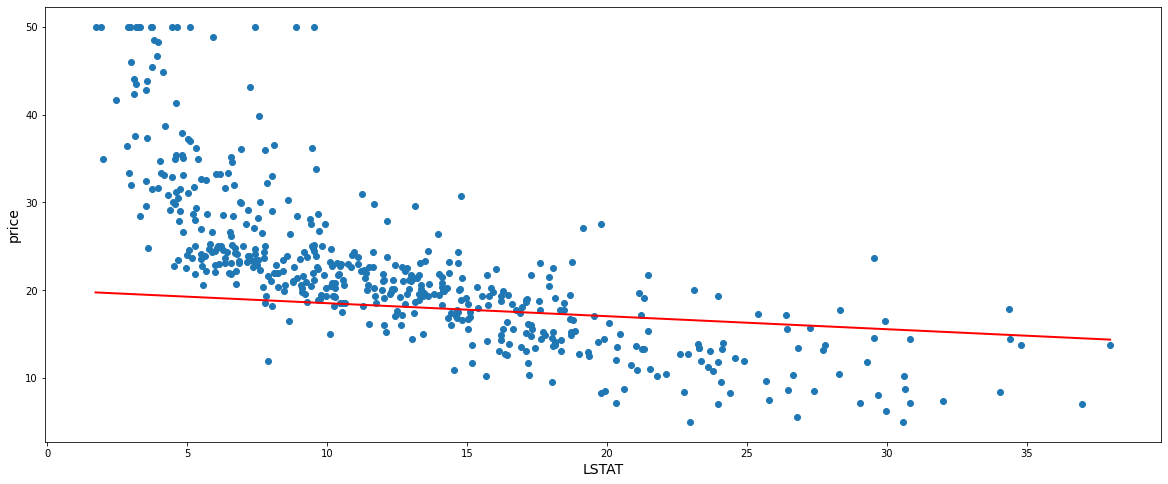

In [15]:
best_fit(df.LSTAT,df.price,m,c)

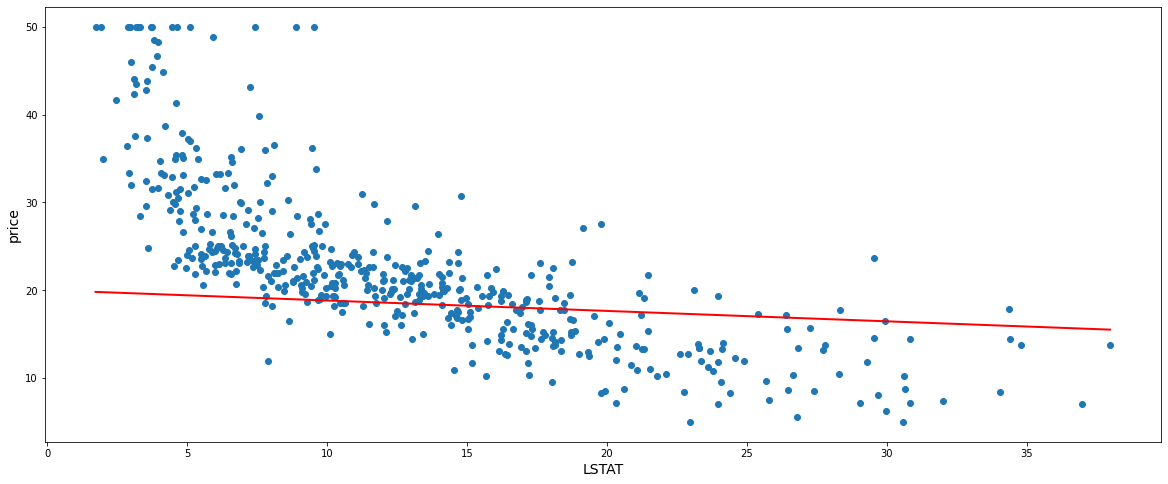

m = -0.11853177274272958
c = 20.018171776950187
Cost = 89.78776271804729


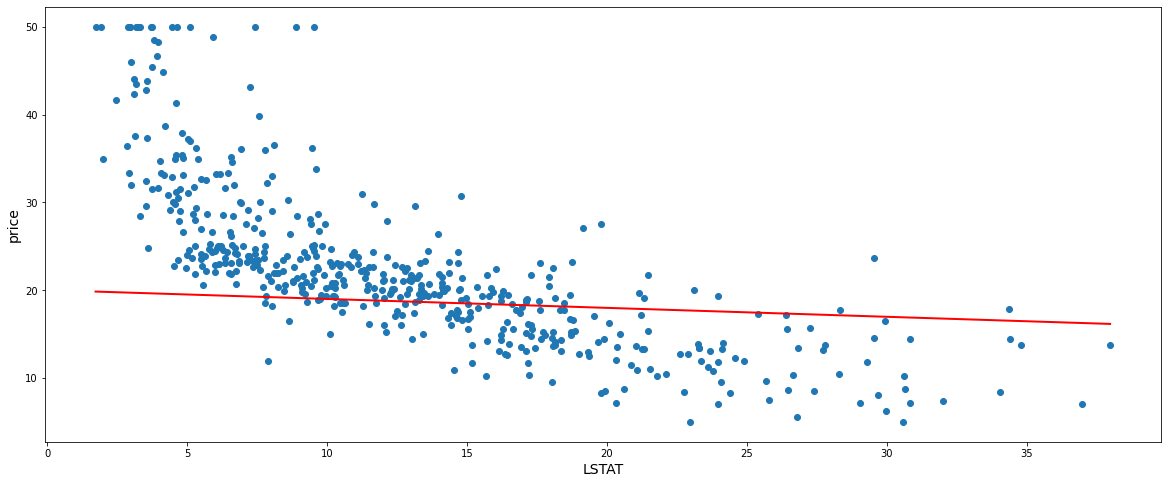

m = -0.10158071417663316
c = 20.025771660445614
Cost = 89.50335053290787


In [16]:
m = m - (lrn*gradients(df.LSTAT, df.price, m, c)[0])
c = c - (lrn*gradients(df.LSTAT, df.price, m, c)[1])
 
best_fit(df.LSTAT,df.price,m,c)
print('m =',m)
print('c =',c)
print('Cost =',mean_squared_error(df.price, (m*df.LSTAT)+c))



m = m - (lrn*gradients(df.LSTAT, df.price, m, c)[0])
c = c - (lrn*gradients(df.LSTAT, df.price, m, c)[1])
 
best_fit(df.LSTAT,df.price,m,c)
print('m =',m)
print('c =',c)
print('Cost =',mean_squared_error(df.price, (m*df.LSTAT)+c))

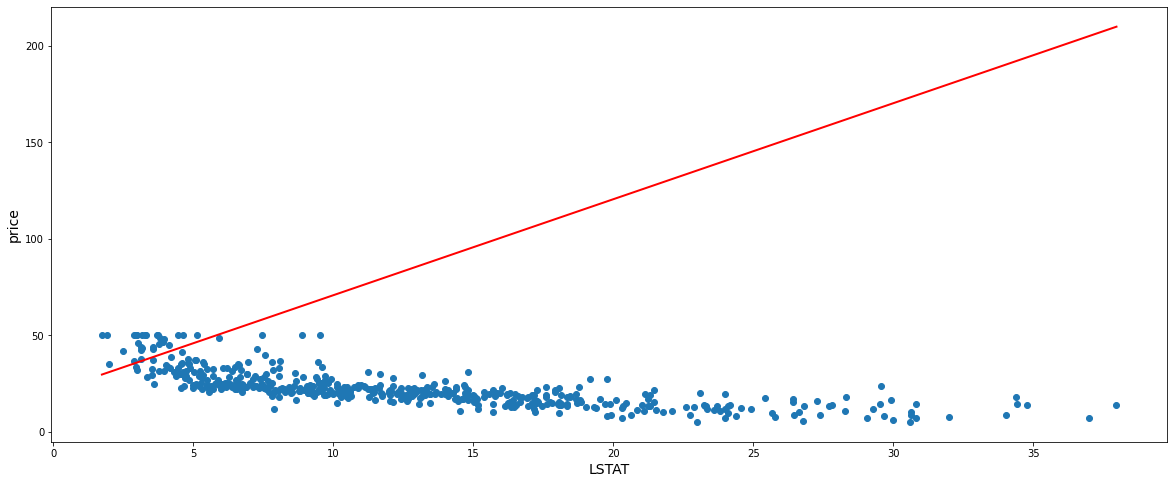

m = 4.978952830039524
c = 21.0126837944664
Cost = 5607.215421816918





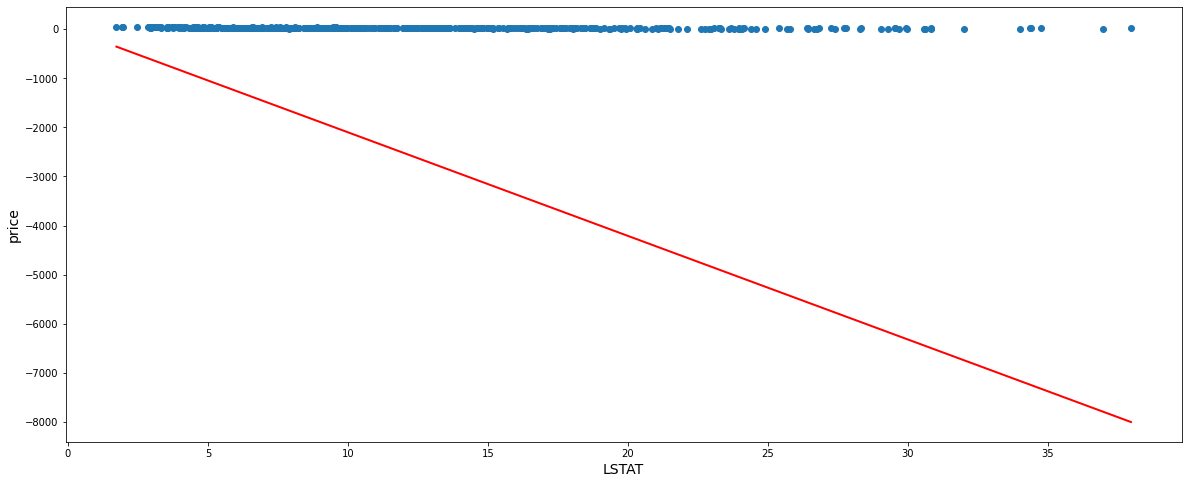

m = -210.9503877751216
c = 8.71690729379977
Cost = 9442876.01360578





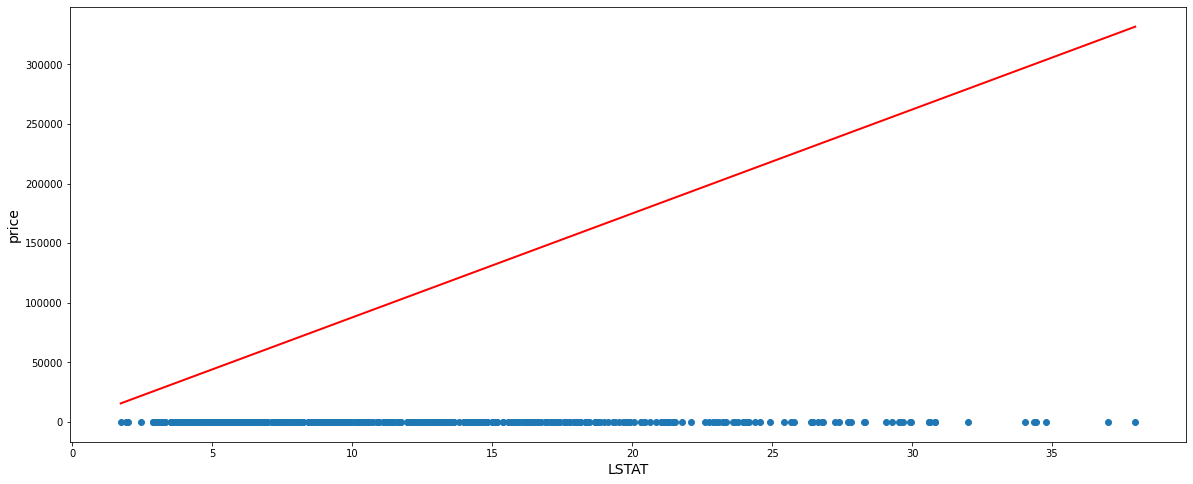

m = 8716.194690999957
c = 545.3138065507819
Cost = 16146073549.704693





In [17]:
lrn = 0.1
iters = 3
 
m=-0.2
c=20
m_gradient = gradients(df.LSTAT,df.price,m,c)[0]
c_gradient = gradients(df.LSTAT,df.price,m,c)[1]
print('\n\n')
 
i=1
while i<=iters:
    m = m-(lrn*m_gradient)
    c = c-(lrn*c_gradient)
    m_gradient = gradients(df.LSTAT,df.price,m,c)[0]
    c_gradient = gradients(df.LSTAT,df.price,m,c)[1]
    best_fit(df.LSTAT,df.price,m,c)
    print('m =',m)
    print('c =',c)
    print('Cost =',mean_squared_error(df.price, (m*df.LSTAT)+c))
    print('\n\n')
    i += 1

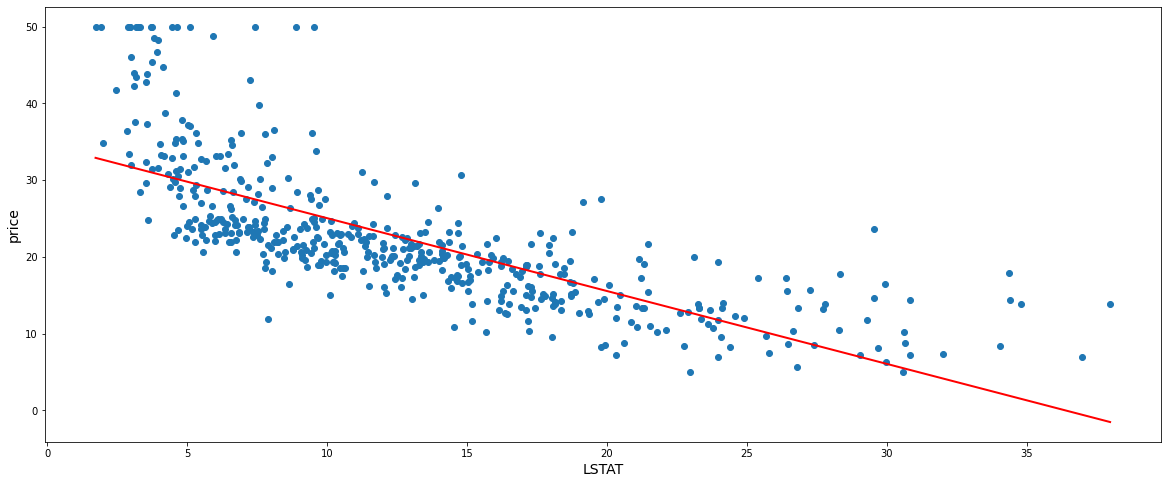

m = -0.9499113654048135
c = 34.55154249932774
Cost = 38.48296850410645


In [19]:
def gradient_descent(X, y, m_start=0, c_start=0, lrn=0.001, n_iter=10000):
     
    # A dataframe is initiated
    gradient_df = pd.DataFrame(columns=['m','c','cost'])
 
    # Value of m and c
    m = m_start
    c = c_start
     
    predicts = m*X + c
    cost = mean_squared_error(y,predicts)
     
    # 1st entry is made for the cost a initial values of m and c
    gradient_df.loc[0] = [m,c,cost]
     
    n = 1
    while n<=n_iter:
        m_grad = gradients(X,y,m,c)[0]
        c_grad = gradients(X,y,m,c)[1]
 
        m = m - m_grad*lrn
        c = c - c_grad*lrn
 
        predicts = m*X + c
        cost = mean_squared_error(y,predicts)
 
        gradient_df.loc[n] = [m,c,cost]
 
        n += 1
 
    return gradient_df
 
    
    
descent = gradient_descent(df.LSTAT,df.price,n_iter=20000)
 
req = descent[descent.cost==descent.cost.min()]
m = req.iloc[0,0]
c = req.iloc[0,1]
best_fit(df.LSTAT,df.price,m,c)
 
print('m =',m)
print('c =',c)
print('Cost =',mean_squared_error(df.price, (m*df.LSTAT)+c))


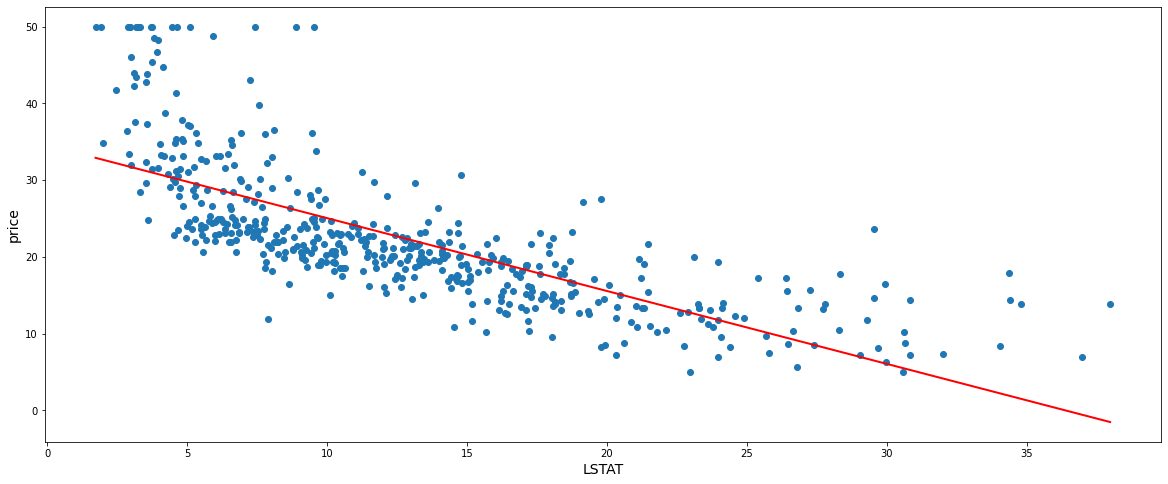

m = -0.9500493537579906 
c = 34.5538408793831 
Cost = 38.48296722989415


In [29]:
# new = df[['LSTAT', 'price']]
X = df.LSTAT.values.reshape(-1,1)
y = df.price

# Linear Regression model is fit
model = LinearRegression().fit(X,y)
 
m = model.coef_[0]
c = model.intercept_
 
# 'best_fit' is the custom function to fit the straight line with the provided coefficient and intercept
best_fit(df.LSTAT,df.price,m,c)
 
print('m =',m,'\nc =',c,'\nCost =',mean_squared_error(df.price, (m*df.LSTAT)+c))

In [33]:
# 'multi' is the dataframe extract of the main data frame with one additional features
multi = df[['RM','LSTAT','price']]
multi.head()

,RM,LSTAT,price
0,6.019,12.92,21.2
1,6.249,10.59,20.6
2,6.122,14.10,21.5
3,6.164,21.46,21.7
4,6.103,23.29,13.4


In [46]:
# 'multi_gradient_descent' performs gradient descent over multiple features at a time
def multi_gradient_descent(X, y, m_start=0, c=0, lrn=0.001, n_iters=25000):
    
    store = pd.DataFrame(columns= [f'm_of_{i}' for i in X.columns] + ['c', 'cost'])
    
    ms = [{f'm{i}' : m_start} for i in X.columns]
    dic = {k:v for x in ms for k,v in x.items()}
    dic

    nos = 0
    while nos<=n_iters:

        res = []
        for i in range(len(X.columns)):
            mul = list(dic.values())[i] * X.iloc[:,i]
            res.append(mul)
        pred = sum(res) + c        

        

        m_gradients = []
        for i in range(len(X.columns)):
            grad = (sum((y - pred)*X.iloc[:,i]) * (-2/len(X)))
            m_gradients.append(grad)

        m_gradients = np.array(m_gradients)        
        
        
        c_gradient = sum(y - pred) * (-2/len(X))


        k=0
        for i in dic.keys():
            dic[i] = dic[i] - lrn*m_gradients[k]
            k += 1
        
        
        c = c - lrn*c_gradient
        
        
        res = []
        for i in range(len(X.columns)):
            mul = list(dic.values())[i] * X.iloc[:,i]
            res.append(mul)
        predicted = sum(res) + c
        
        
        cost = mean_squared_error(y,predicted)
        
        store.loc[nos] = list(dic.values())+[c,cost]
        
        
        nos += 1

    return store

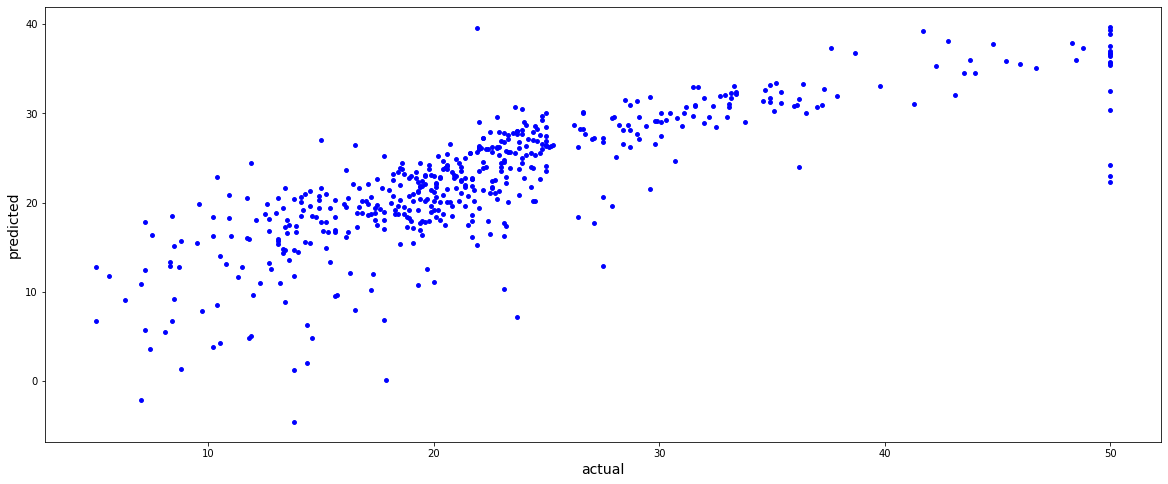

In [57]:
X = multi.drop('price', axis=1)
y = multi.price

obt = multi_gradient_descent(X,y,n_iters=20000)

rr = obt[obt.cost == obt.cost.min()]

m = np.array(rr.iloc[0,:-2])
c = rr.c.values[0]
preds = np.matmul(X, m) + c

X = multi.drop('price', axis=1)
y = multi.price



 
# Creating dataset
a = np.array(X.LSTAT)
b = np.array(X.RM)
c = np.array(y)
p = preds
 
# Creating figure
plt.figure(figsize = (13,13))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(a, b, c, color = "green", s=8, label='actual values')
ax.scatter3D(a, b, p, color = "red", s=8, label='predicted values')

ax. set_xlabel('LSTAT', fontsize=13)
ax. set_ylabel('RM', fontsize=13)
ax. set_zlabel('price', fontsize=13)
plt.legend(fontsize=12)

ax.view_init(30,250)
 
# show plot
plt.show()

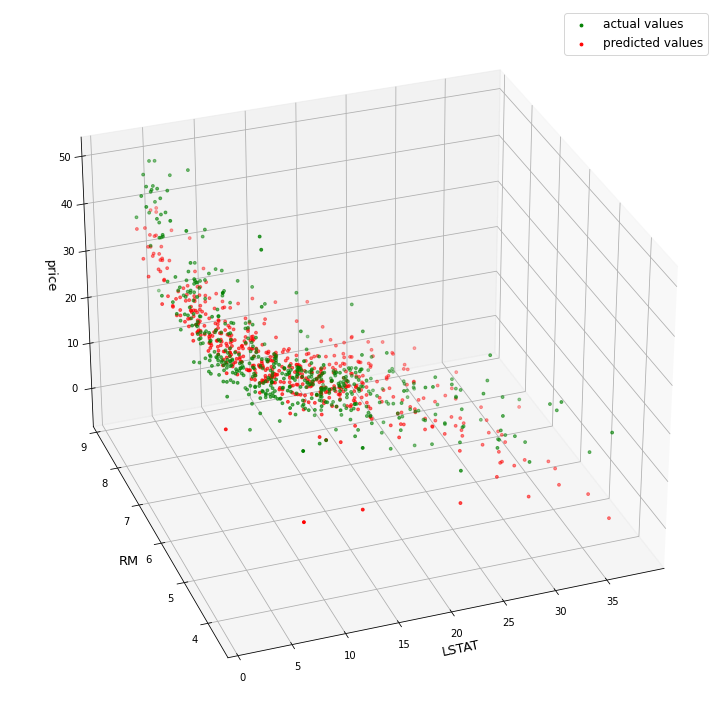

Cost = 30.527762735986848


In [128]:
X = multi.drop('price', axis=1)
y = multi.price


# Import libraries
from mpl_toolkits import mplot3d
 
# Creating dataset
# a = np.random.randint(100, size =(50))
# b = np.random.randint(80, size =(50))
# c = np.random.randint(60, size =(50))

a = np.array(X.LSTAT)
b = np.array(X.RM)
c = np.array(y)
p = preds
 
# Creating figure
plt.figure(figsize = (13,13))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(a, b, c, color = "green", s=8, label='actual values')
ax.scatter3D(a, b, p, color = "red", s=8, label='predicted values')

ax. set_xlabel('LSTAT', fontsize=13)
ax. set_ylabel('RM', fontsize=13)
ax. set_zlabel('price', fontsize=13)
plt.legend(fontsize=12)

ax.view_init(30,250)
 
# show plot
plt.show()



print('Cost =',mean_squared_error(y,preds))

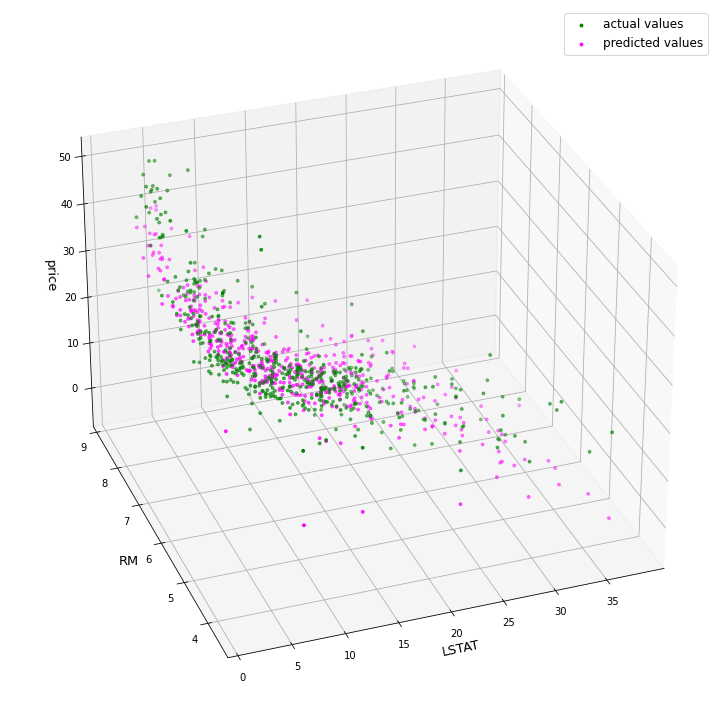

Cost = 30.51246877729947


In [135]:
lr_multi = LinearRegression().fit(X,y)
lr_preds = lr_multi.predict(X)

# Creating dataset
a = np.array(X.LSTAT)
b = np.array(X.RM)
c = np.array(y)
p = lr_preds
 
# Creating figure
plt.figure(figsize = (13,13))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(a, b, c, color = "green", s=8, label='actual values')
ax.scatter3D(a, b, p, color = "magenta", s=8, label='predicted values')

ax. set_xlabel('LSTAT', fontsize=13)
ax. set_ylabel('RM', fontsize=13)
ax. set_zlabel('price', fontsize=13)
plt.legend(fontsize=12)

ax.view_init(30,250)
 
# show plot
plt.show()



print('Cost =',mean_squared_error(y,lr_preds))